# Recurrent Networks

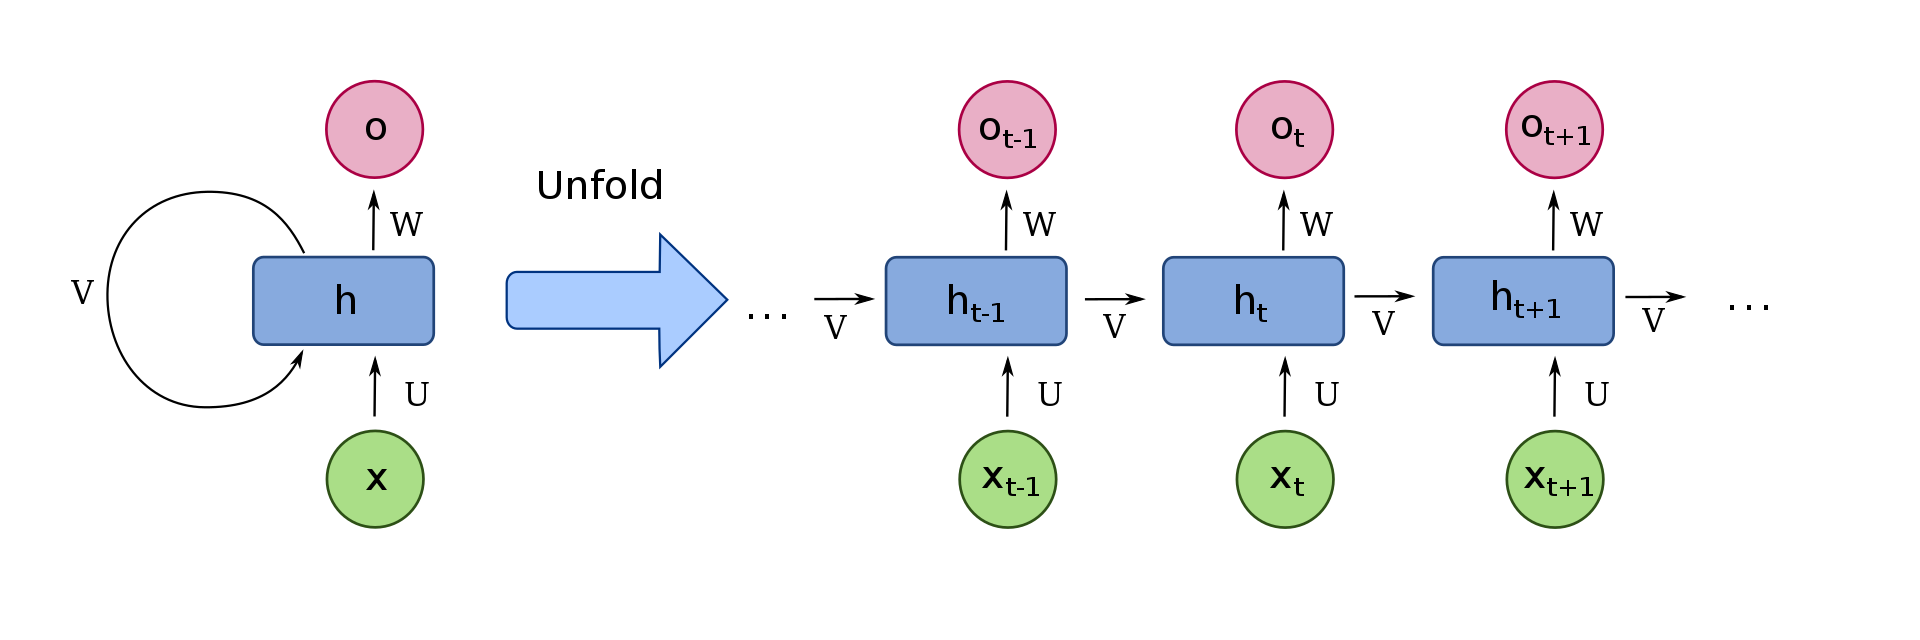

In [ ]:
from IPython.display import Image
Image(filename='Recurrent_neural_network_unfold.svg.png')

## Background
Recurrent neural networks (the branch) have a vast history and modern implementations are traced back to 1986 when Geoffrey Hinton (yes, the same guy that developed backpropagation and RMSProp optimization) and a psychologist, David Rumelhart published ["Learning representations by back-propagating errors."](https://www.nature.com/articles/323533a0). Before this modern implementation, however, recurrent connections existed in neural networks such as Hopfield Networks. They have much the same origin as standard fully connected feed forward networks, however they differ in this key recurrent connection. In addition to the recurrent connection, recurrent neural networks have the ability to vary the output size. The input to output mapping can be 1-to-1, 1-to-Many, Many-to-1, or Many-to-Many. This is incredibly useful for varying sequence lengths. **Note: The branch of neural networks is called Recurrent Neural Networks and there is a basic model (seen above) called a Recurrent Neural Network model. To differentiate between the two, I will refer to the model as an RNN and the network architecture branch as recurrent neural networks.**

### The RNN
The original RNN model is seen in the image above. For each input $x$ in a sequence the network produced an output, $o$ and created a "recurrent" loop connection to itself, $v$. Therefore, as the sequence progressed, the network would "unroll" and produce a 1:1 neuron to input mapping with connections between neurons. This allowed the RNN to garner information from previous sequence values and "learn" over the sequence. Naturally, this led classical RNNs to being used heavily in time series and Natural Language Processing (NLP) problems.

[RNNs](https://machinelearningmastery.com/an-introduction-to-recurrent-neural-networks-and-the-math-that-powers-them/) as a whole are notoriously difficult to mathematically calculate (due to the recurrent nature) so in order to best explain them we'll apply the following definitions:
1. $x_t \in \mathbb{R}$ - input at timestep t
2. $y_t \in \mathbb{R}$ - output at timestep t
3. $h_t \in \mathbb{R}^m$ - hidden state at time t. $m$ corresponds to the number of hidden units. $h_0$ is normally initialized to $0$.
4. $U \in \mathbb{R}^m$ - input weights
5. $V \in \mathbb{R}^{m \times m}$ - hidden unit weights
6. $W \in \mathbb{R}^m$ - output weights
7. $b_h \in \mathbb{R}^m$ - bias for recurrent layer
8. $b_y \in \mathbb{R}$ - bias for feedforward layer
9. $f(\cdot)$ - an activation function, normally $\tanh$ or ReLU

Now, if you know fully connected feed forward neural networks, you'll quickly notice this new term called the hidden state. In order to calculate a forward pass we first must calculate the hidden state of the current neuron. Once we calculate our $h_t$ we can then calculate the output. The forward pass is:

$$
h_{t+1} = f(Ux_t + Vh_t + b_h) \\
y_t = f(W \cdot h_t + b_y)
$$

When broken down, its actually fairly similar to other neural networks. Going backwards, we see that the output is simply the dot product of the hidden state and the weights plus the bias fed through an activation function. The addition, as stated earlier is the hidden state calculated via the input and the previous hidden state. Try and walk through it on the diagram and imagine how it would "unroll". Then, once you grasp the concept of unrolling, think about how gradients will flow back through this network. This is going to be a huge problem with RNNs (and recurrent neural networks as a whole).

### Long Short-Term Memory (LSTM)
LSTMs, [first introduced in 1997](https://ieeexplore.ieee.org/abstract/document/6795963), were designed to address a problem called "vanishing gradients" that occurred quite frequently in RNNs. It was found that as layers continuously unrolled the gradient moving backwards through the hidden weights shrank smaller and smaller "vanishing" and never updating the early weights in the network. Well if the early weights don't learn then we have a bit of a struggling network.

LSTMs inherently change the architecture of the "neuron" and add in a couple gates. What were previously called neurons (or perceptrons if you want to be technically correct) are switched to LSTM units. The units are made up of a "cell" ($c$), "input gate" ($i$), "output gate" ($o$), and "forget gate" ($f$).

Each gate requires its own calculation for a forward pass. [It follows](https://en.wikipedia.org/wiki/Long_short-term_memory):

$$
f_t = \sigma(U_fx_t + V_fh_{t-1} + b_f) \\
i_t = \sigma(U_ix_t + V_ih_{t-1} + b_i) \\
o_t = \sigma(U_ox_t + V_oh_{t-1} + b_o) \\
\hat{c}_t = \tanh(U_cx_t + V_ch_{t-1} + b_c) \\
c_t = f_t \circ c_{t-1} + i_t \circ \hat{c}_t \\
h_t = o_t \circ \tanh(c_t)
$$

And then the standard dot product between the output weights and hidden state plus the bias we've seen everywhere else to calculate the output. The key here is the cell state. Notice how it persists values going both forwards and backwards. It allows gradients to move back through the network with less reduction thereby significantly reducing the risk of vanishing gradients. For more info please watch some of the videos [here](https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21) as these networks are much easier explained through being seen in action.

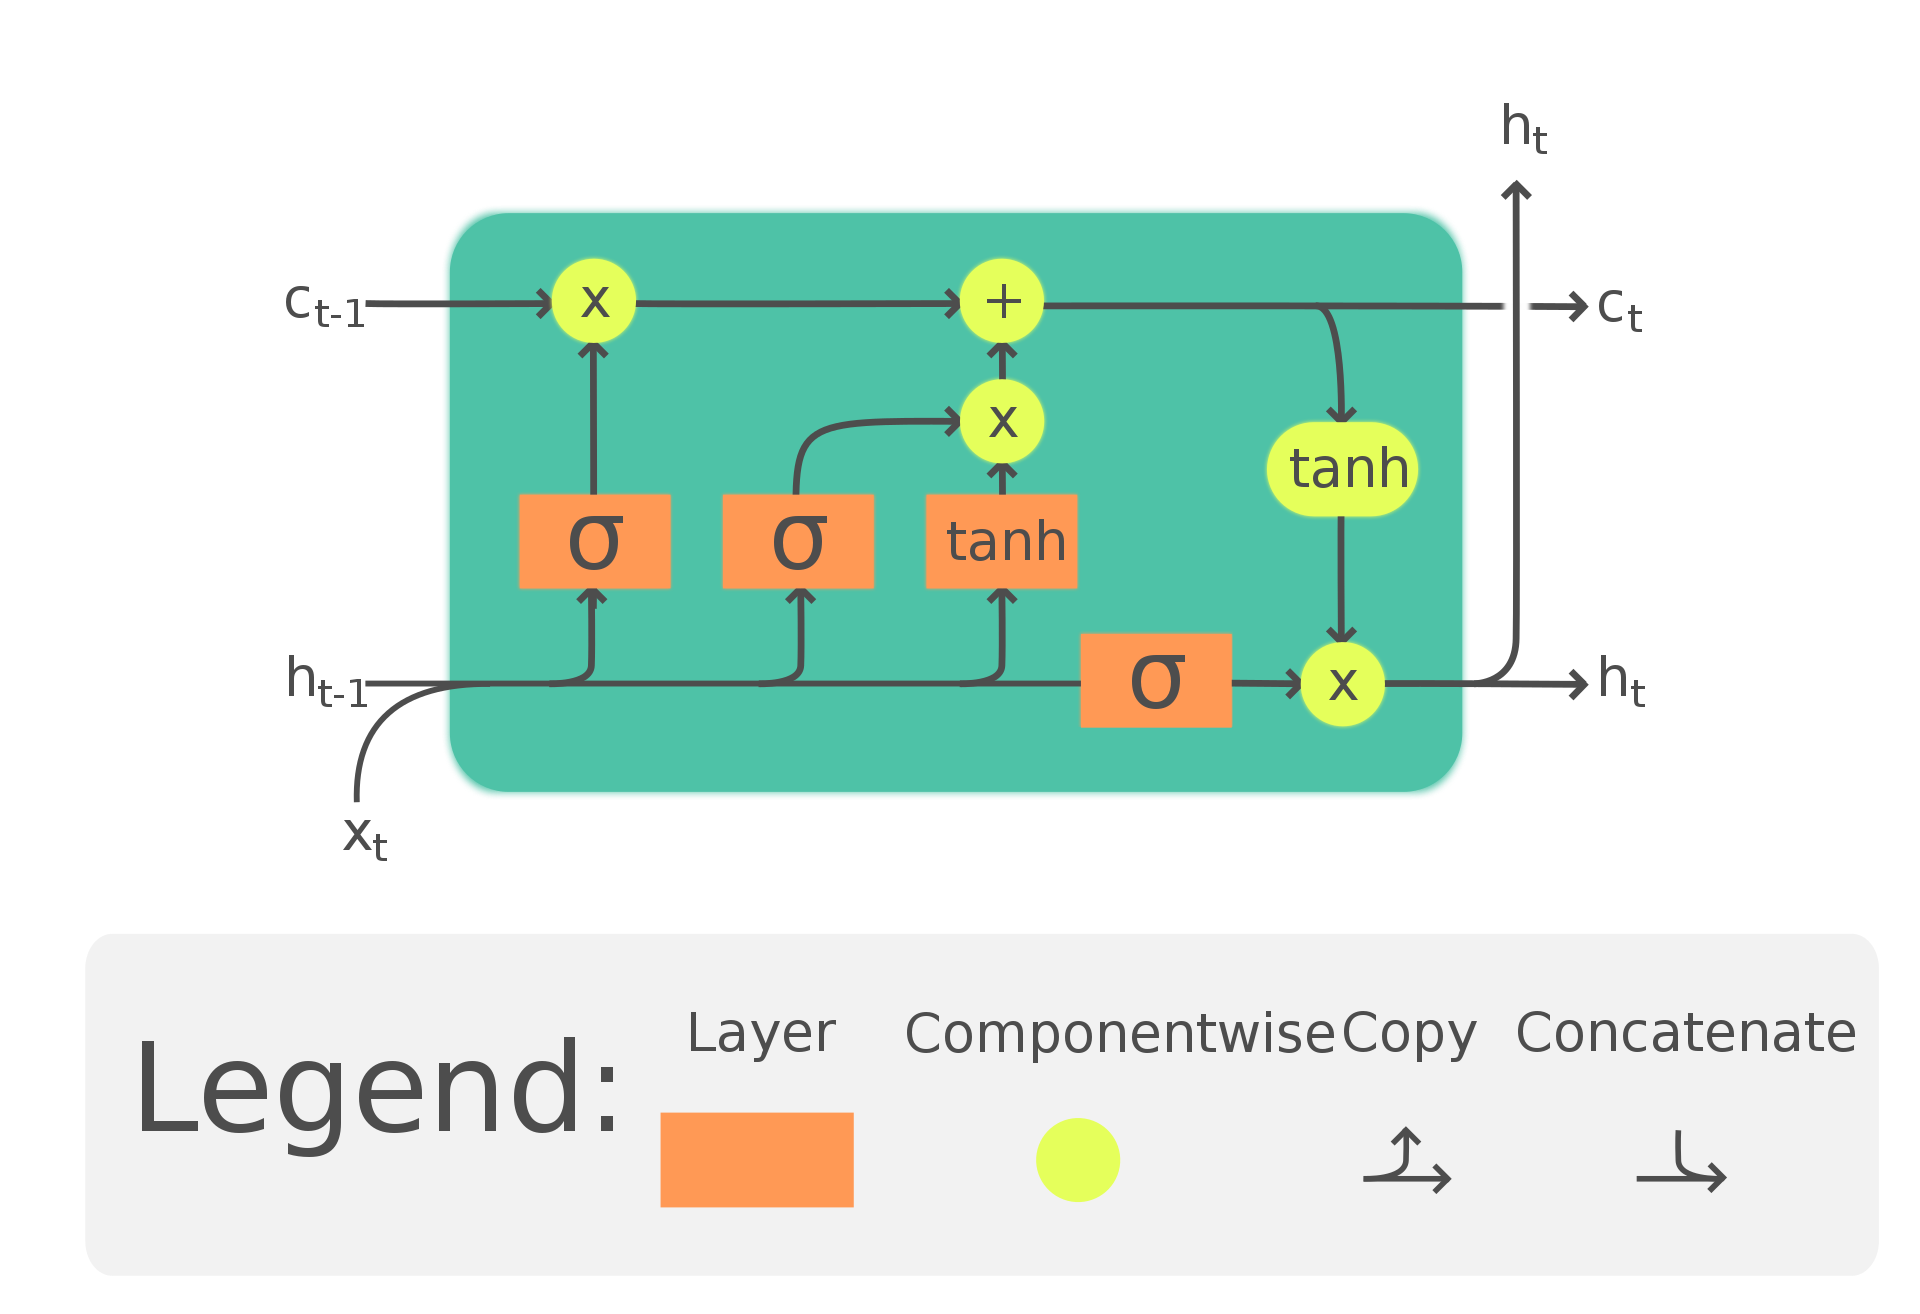

In [ ]:
from IPython.display import Image
Image(filename='LSTM_Cell.svg.png')

### Gated Recurrent Unit (GRU)
Finally, one of the more recent developments in the recurrent neural network branch is the Gated Recurrent Unit (GRU). This new unit replaces LSTMs and significantly reduces the required number of parameters. As you can see from the LSTM above, we have weight matrices that contain weights corresponding to all 3 gates and the cell state. With a GRU there are only 2 gates, update and reset. And with this parameter reduction, the model itself also addresses vanishing gradients. Since it was developed in 2014, there is still significant research involving this network and comparing it with LSTMs but at the moment they appear to perform relatively similar.

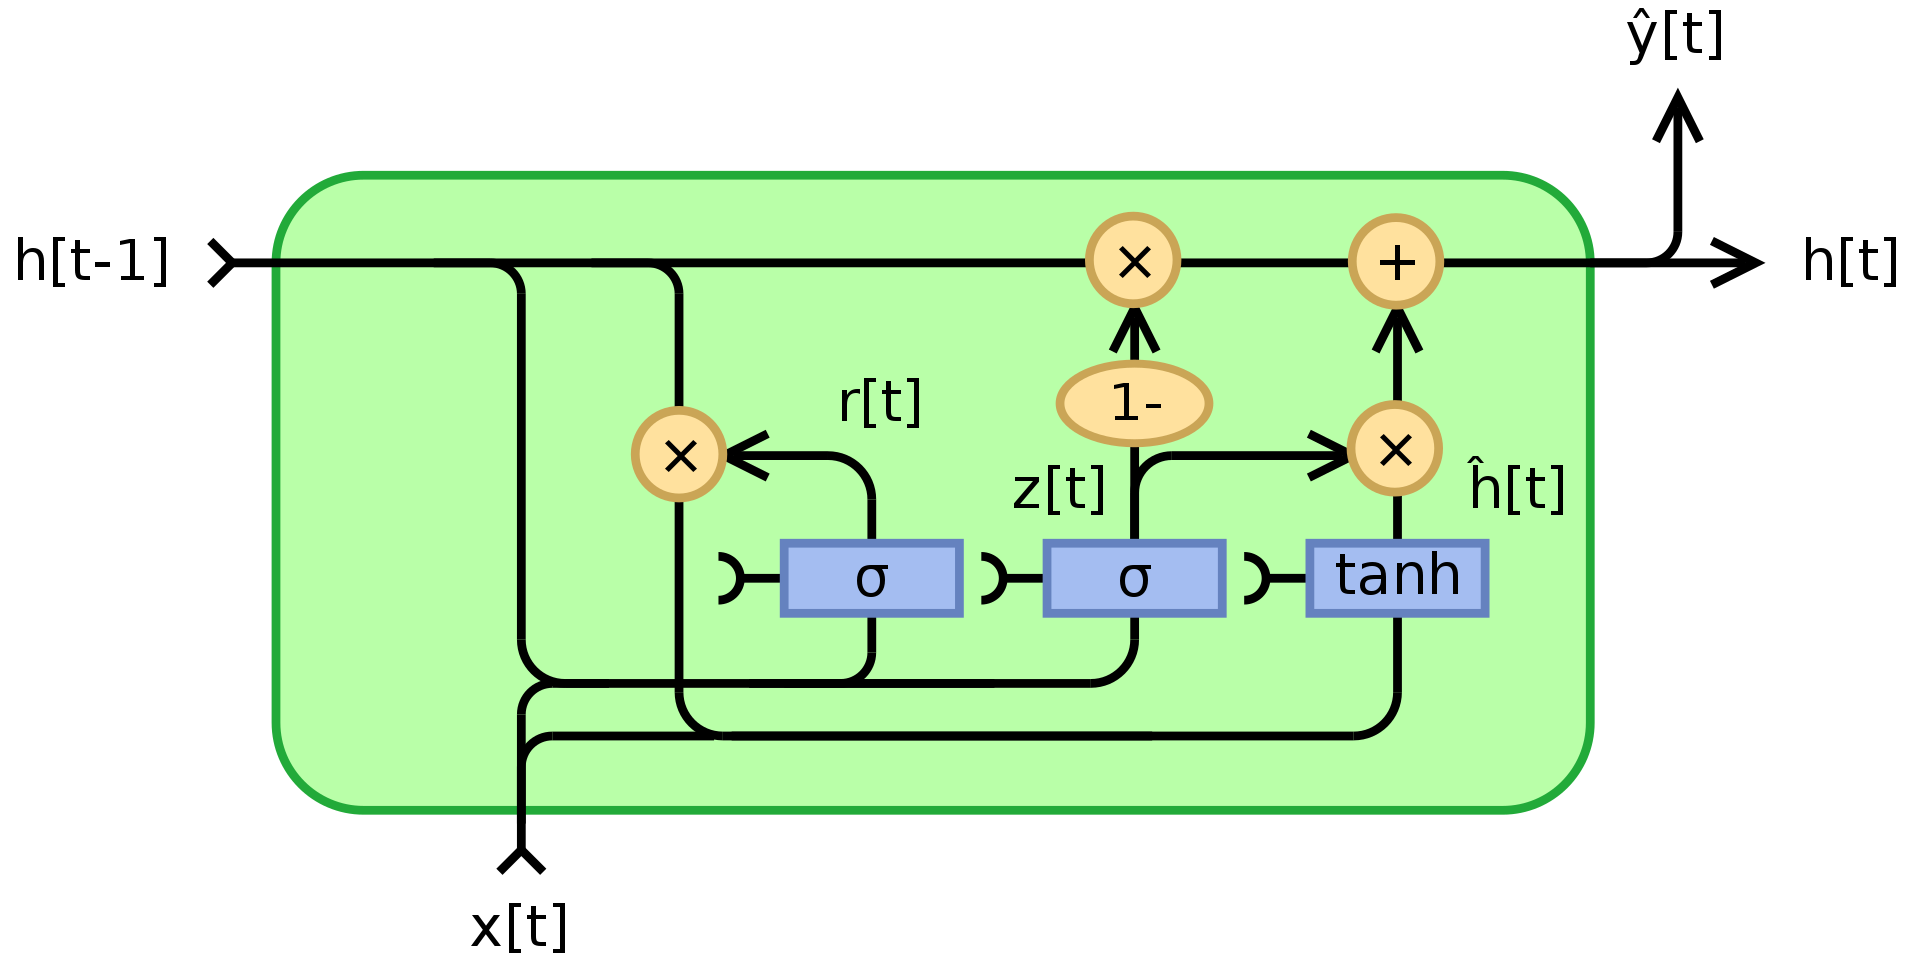

In [ ]:
from IPython.display import Image
Image(filename='1920px-Gated_Recurrent_Unit,_base_type.svg.png')

### Pros and Cons
Overall, recurrent neural networks have seen a lot of use in signal processing and NLP. They have a lot of advantages, but as one could guess, they also have a lot of problems.

*Pros:*
1. The hidden state allows a sort of "memory" to exist in the network
2. They can handle varying input lengths
3. Easy processing of sequence data
4. Can have varying outputs

*Cons:*
1. Computation!!! Limited by sequential processing since the next unroll depends on the previous layer
2. Exploding Gradients exist in all 3 networks described above
3. Vanishing Gradients can still exist if your sequence is long enough
4. Lots of parameters per input (parameter spaces can explode)

This a simple very small list. What other examples can you think of?

### Future
LSTMs are currently used by IBM, Microsoft, Facebook, Google, etc. In fact, both Siri and Alexa make use of bi-directional LSTMs for text-to-speech. They are used extensively and incredibly powerful. However, people are starting to look in other directions because of the computational limitations. Namely, many NLP developers are looking at a new tool called [Transformers](https://en.wikipedia.org/wiki/Transformer_(machine_learning_model)) introduced by Google Brain in 2017. They allow for parallel computation and use an idea called "attention" instead of recurrent connections allowing for parallel computation and fixing the vanishing gradient problem. They are used extensively in BERT and GPT, currently the best NLP models on the planet. So a question to ponder, does this mean recurrent neural networks will soon be obsolete?